# EDA of NBA Active Players Data

#### Questions:
- What is the current player age distribution?
- At what age do players tend to "peak" statistically?
    - This can be broken down into pts, rbs, fg%, etc
    - Over time (both age and experience), how does performance change?
- What position performs the best? Do certain positions score/rebound/assist more than others?


#### Be Careful:
- If a player is in the NBA for a long time, they have performed well (and vice versa).
- Not every season has the same number of games played... (e.g. COVID year)

#### More Data?
- Height, weight, wingspan
- Right vs. Left shooter
- Draft info
- Salary
- Num injuries

In [188]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df = pd.read_csv('nba.csv').drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

## Cleaning

In [190]:
# convert numerical fields to correct datatype
numeric_cols = [col for col in df.columns if col not in ['Name', 'Season', 'Tm', 'Lg', 'Pos']]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [191]:
# remove any obs of DID NOT PLAY
discard = ['Did Not Play']
df = df[df['Pos'].str.contains('|'.join(discard))==False]

In [192]:
# remove stats from current season
df = df[df['Season'].str.contains('2022-23')==False]

## Exploring

In [193]:
df.head(10)

,Name,Exp,Season,Age,Tm,Lg,Pos,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,1,2016-17,23.0,OKC,NBA,SG,68.0,6.0,15.5,...,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0
1,Álex Abrines,2,2017-18,24.0,OKC,NBA,SG,75.0,8.0,15.1,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
2,Álex Abrines,3,2018-19,25.0,OKC,NBA,SG,31.0,2.0,19.0,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
3,Precious Achiuwa,1,2020-21,21.0,MIA,NBA,PF,61.0,4.0,12.1,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
4,Precious Achiuwa,2,2021-22,22.0,TOR,NBA,C,73.0,28.0,23.6,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
6,Quincy Acy,1,2012-13,22.0,TOR,NBA,PF,29.0,0.0,11.8,...,0.816,1.0,1.6,2.7,0.4,0.4,0.5,0.6,1.8,4.0
7,Quincy Acy,2,2013-14,23.0,TOT,NBA,SF,63.0,0.0,13.4,...,0.660,1.1,2.3,3.4,0.4,0.4,0.4,0.5,1.9,2.7
8,Quincy Acy,3,2013-14,23.0,TOR,NBA,SF,7.0,0.0,8.7,...,0.625,0.7,1.4,2.1,0.6,0.6,0.4,0.3,1.1,2.7
9,Quincy Acy,4,2013-14,23.0,SAC,NBA,SF,56.0,0.0,14.0,...,0.667,1.2,2.4,3.6,0.4,0.3,0.4,0.5,2.0,2.7
10,Quincy Acy,5,2014-15,24.0,NYK,NBA,PF,68.0,22.0,18.9,...,0.784,1.2,3.3,4.4,1.0,0.4,0.3,0.9,2.2,5.9


In [194]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Age'>

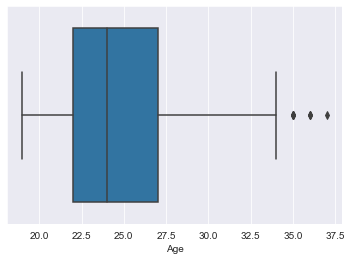

In [195]:
# age distribution
sns.boxplot(data=df, x='Age')

<AxesSubplot:xlabel='Exp'>

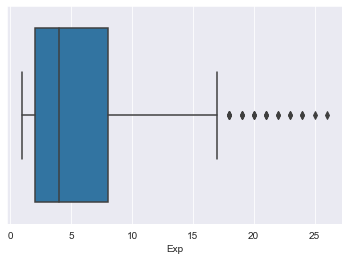

In [196]:
# experience distribution
sns.boxplot(data=df, x='Exp')

In [197]:
df['MP'].max()

39.6

In [198]:
# reduce df to players with 10+ yrs experience
experienced_players = df[df['Exp'] >= 5]['Name'].unique()
ten = df[df['Name'].isin(experienced_players)]

# reduce df to seasons where player played at least 40 games
ten = ten[ten['G'] >= 40]

In [199]:
age = ten.groupby('Age')
age.mean()

age_df = age.mean().reset_index()

In [200]:
exp = ten.groupby('Exp')
exp.mean()

exp_df = exp.mean().reset_index()

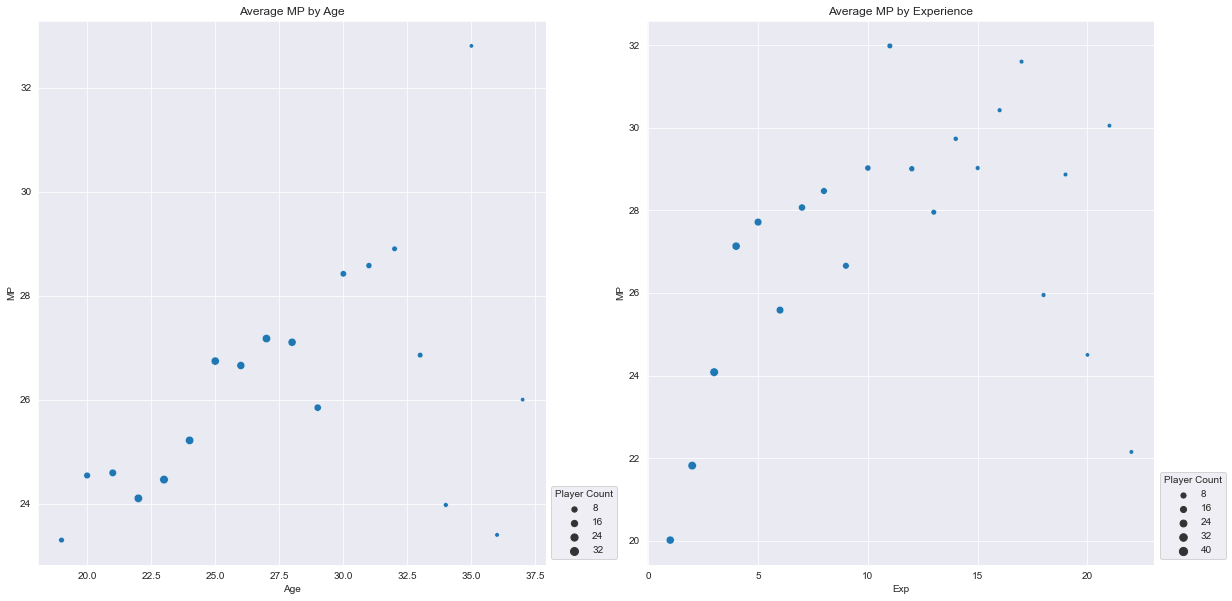

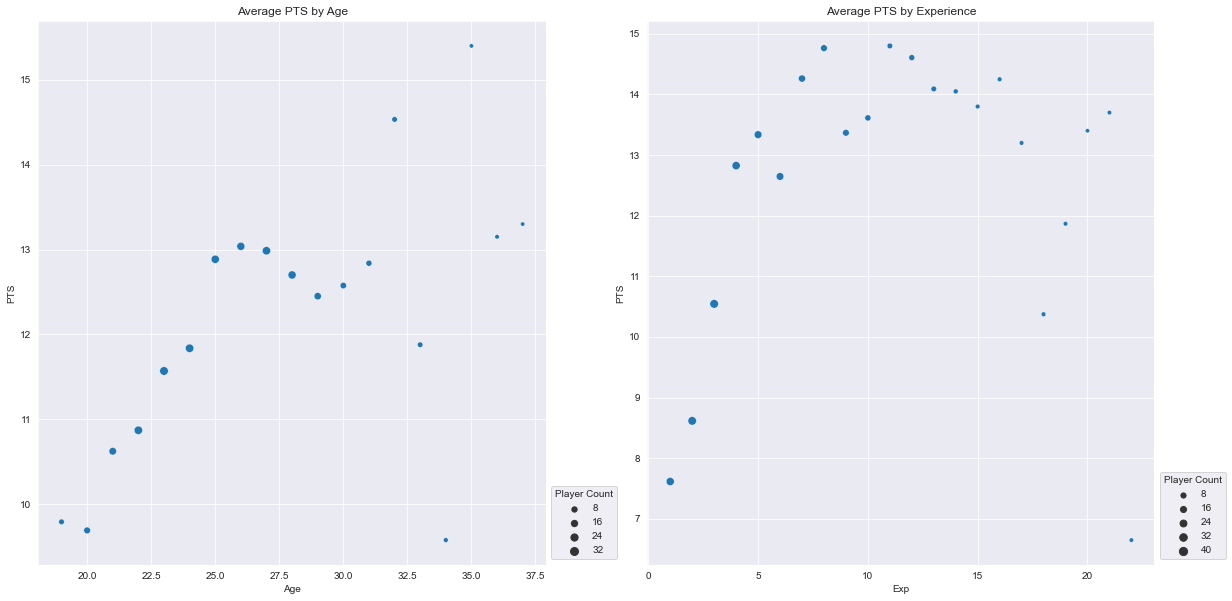

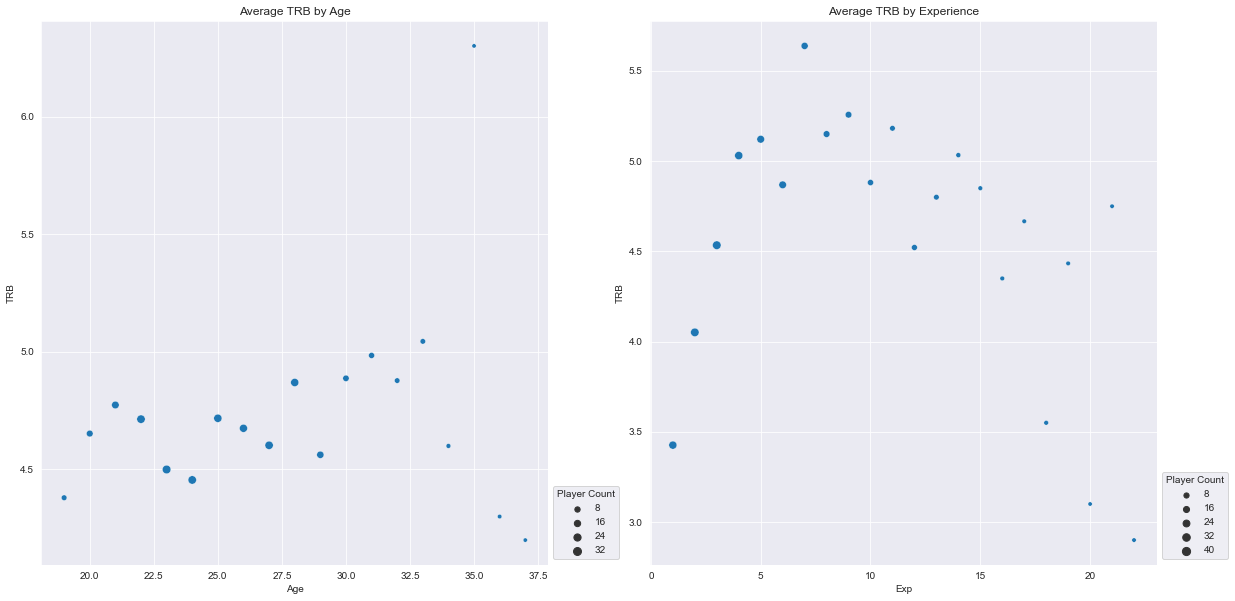

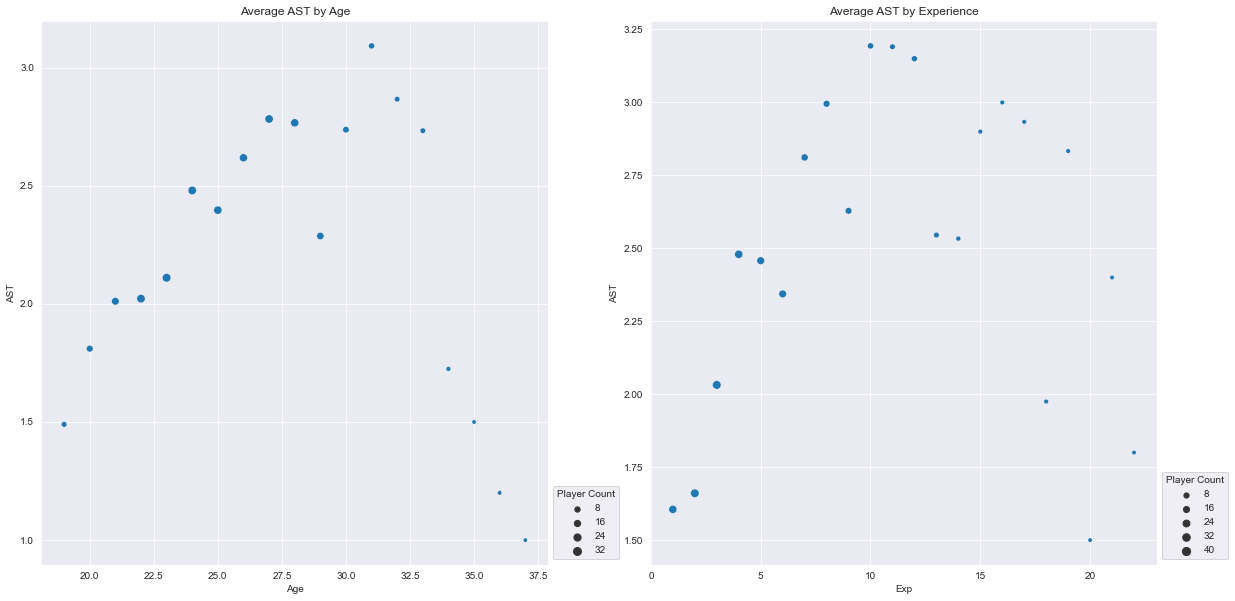

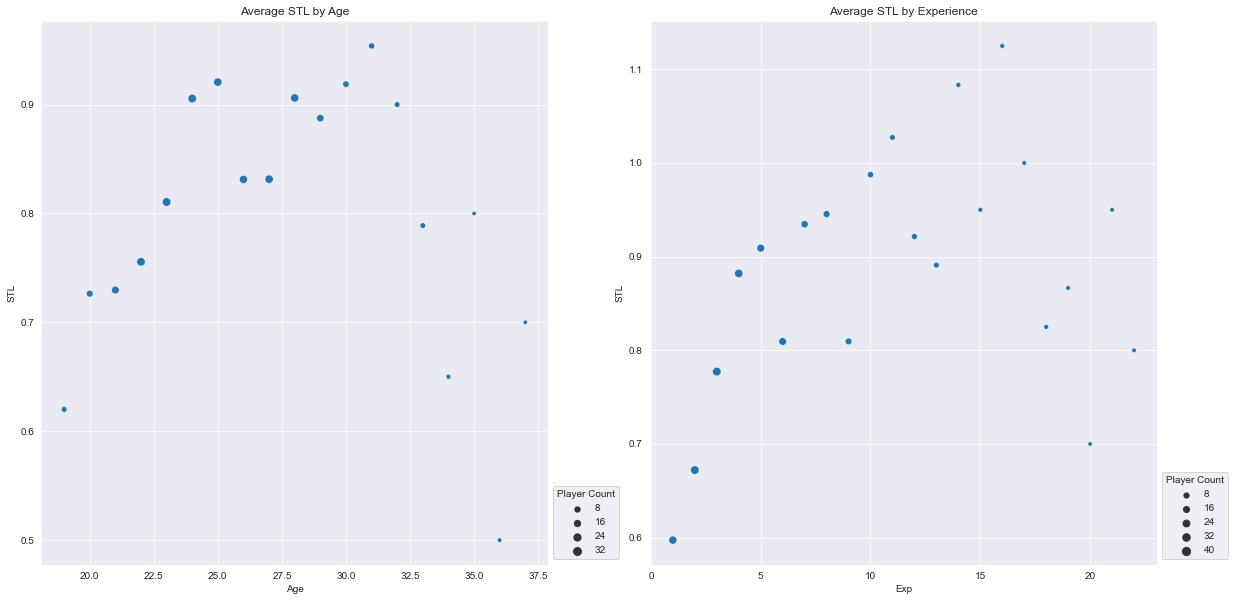

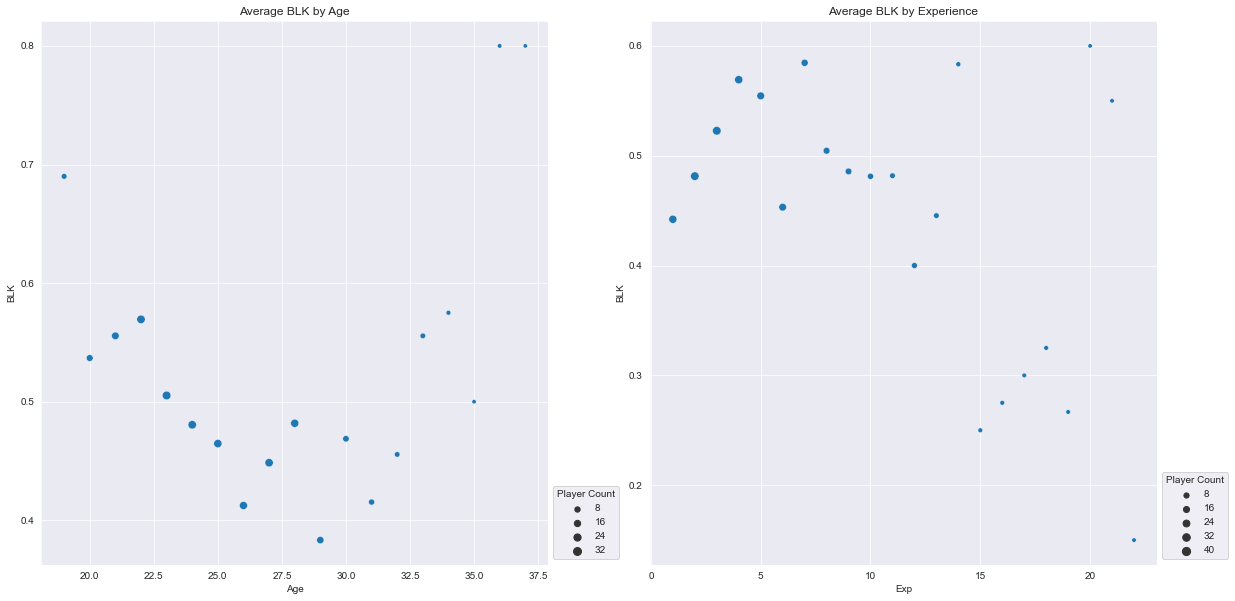

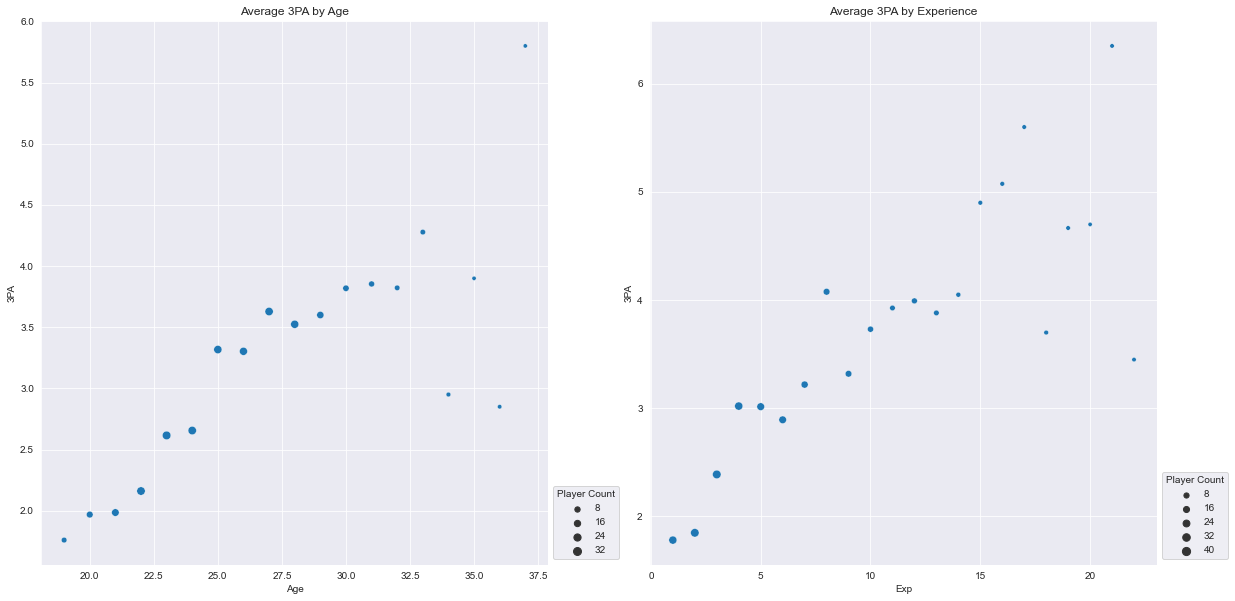

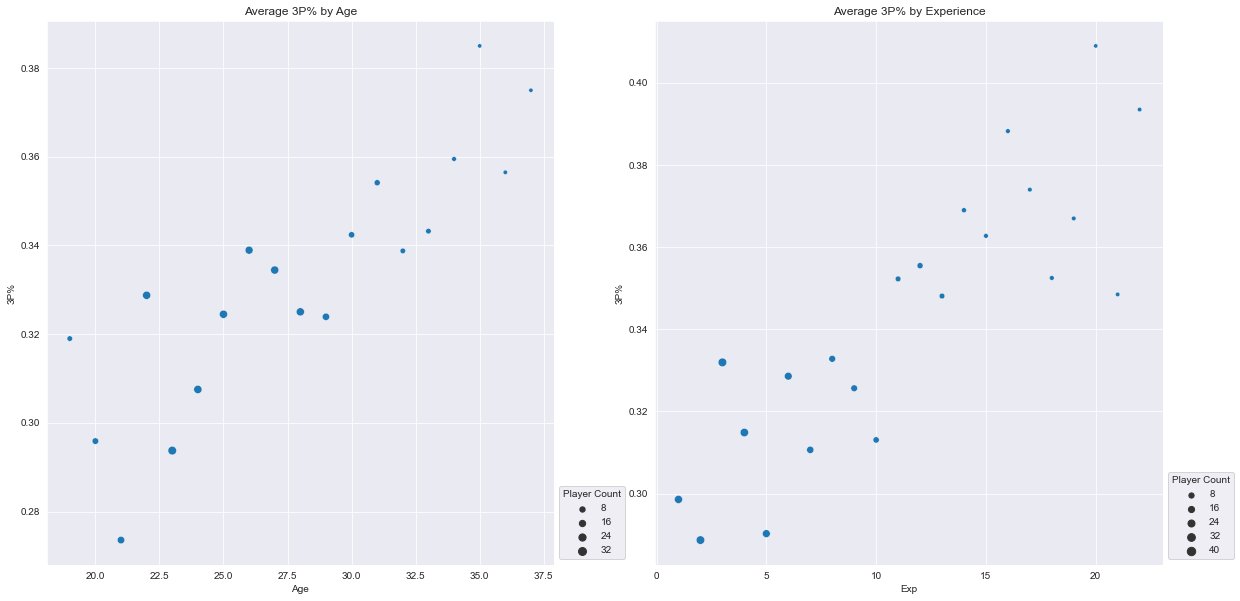

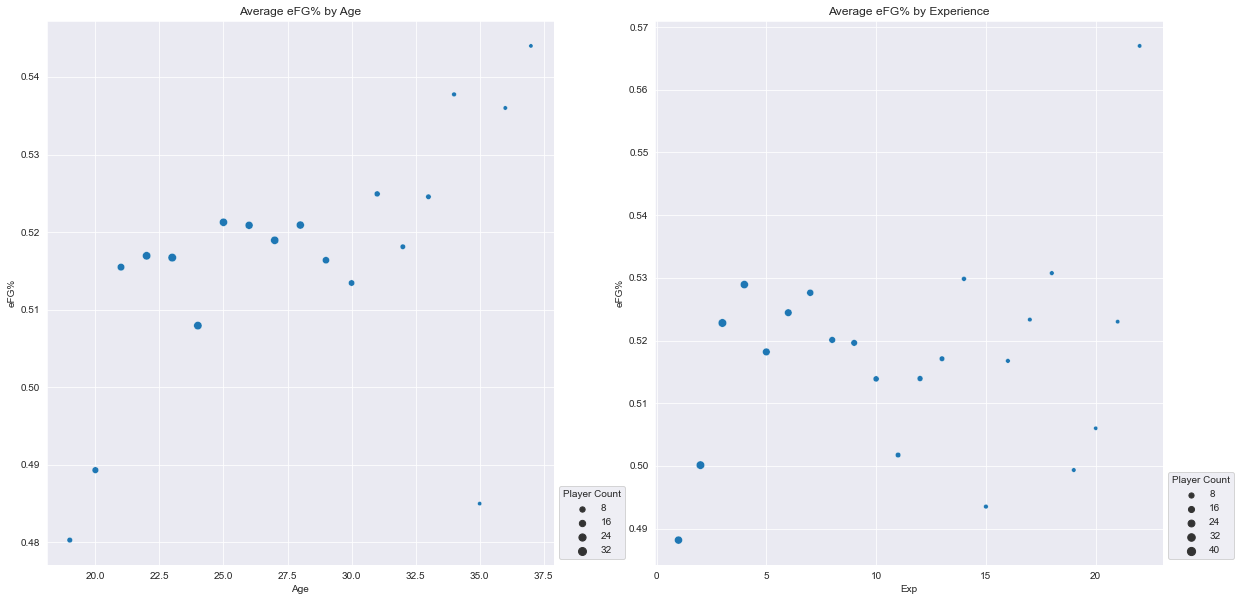

In [201]:
columns_of_interest = ['MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', '3PA', '3P%', 'eFG%']

for col in columns_of_interest:
    fig, axes = plt.subplots(1,2)

    fig.set_figheight(10)
    fig.set_figwidth(20)

    temp_df = age.describe()[col][['count', 'mean']]
    temp_df2 = exp.describe()[col][['count', 'mean']]
    sns.scatterplot(ax=axes[0], data=temp_df, x='Age', y='mean', size='count')
    sns.scatterplot(ax=axes[1], data=temp_df2, x='Exp', y='mean', size='count')

    axes[0].set_ylabel(col)
    axes[1].set_ylabel(col)
    
    axes[0].set_title('Average ' + col + ' by Age')
    axes[1].set_title('Average ' + col + ' by Experience')

    axes[0].legend(title='Player Count', loc=(1.01,0.01))
    axes[1].legend(title='Player Count', loc=(1.01,0.01))

    plt.show()

In [202]:
df.Pos.value_counts()
# very few are listed in multiple positions
# reduce to PG, SG, SF, PF, C
valid_pos = ['PG', 'SG', 'SF', 'PF', 'C']
pos = df[df['Pos'].isin(valid_pos)].groupby('Pos')
pos.mean().reset_index()

# make new pos df
pos_df = pos.mean().reset_index()
pos_df

,Pos,Exp,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,C,4.590909,24.481818,45.454545,22.963636,18.195455,2.953636,5.488182,0.520204,0.200000,...,0.683400,1.814545,3.557273,5.368182,1.017273,0.436364,0.848182,0.928182,1.860000,7.401818
1,PF,6.330000,25.950000,51.520000,31.170000,23.030000,4.196000,8.993000,0.446820,0.906000,...,0.744030,1.169000,3.977000,5.145000,1.604000,0.609000,0.554000,1.214000,1.900000,11.241000
2,PG,6.158879,25.457944,47.261682,22.607477,21.299065,3.198131,7.513084,0.408869,1.064486,...,0.781796,0.514953,2.122430,2.638318,3.300000,0.770093,0.228972,1.414953,1.624299,8.932710
3,SF,6.210526,24.878947,51.847368,31.636842,22.928947,3.466316,7.877368,0.426026,0.964737,...,0.759141,0.862632,3.069474,3.932105,1.751053,0.798421,0.363684,1.162105,1.725263,9.611579
4,SG,5.113924,24.588608,48.537975,26.430380,23.056329,3.984177,9.191139,0.414975,1.291772,...,0.786610,0.568987,2.538608,3.108861,2.141139,0.758861,0.259494,1.307595,1.736709,10.970253


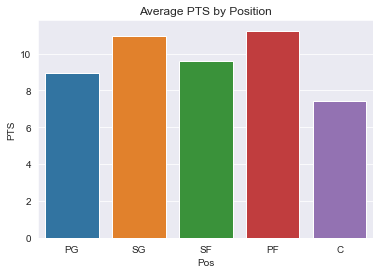

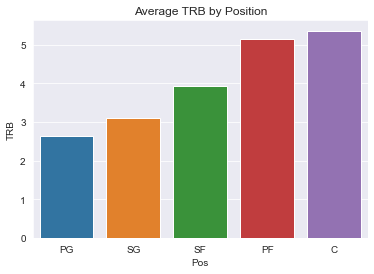

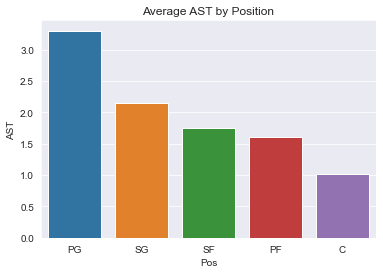

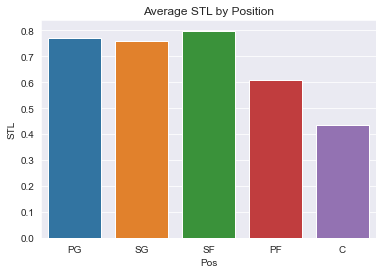

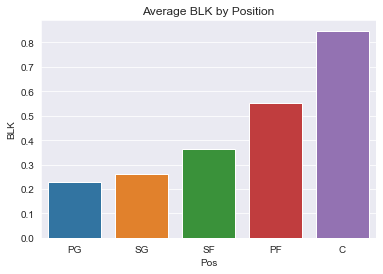

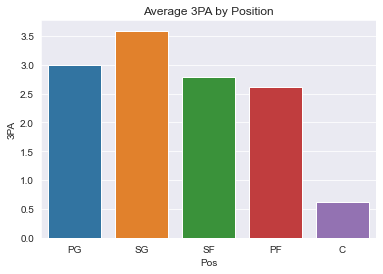

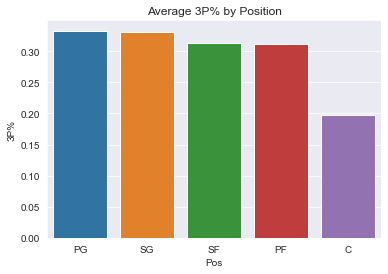

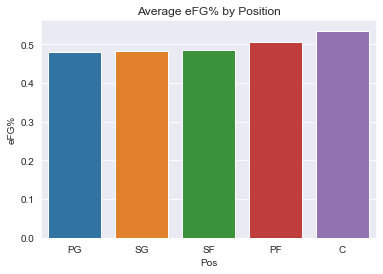

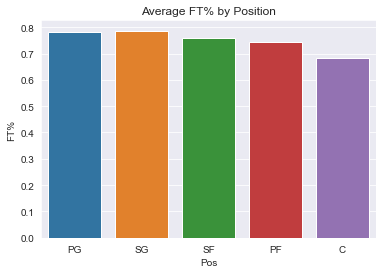

In [203]:
columns_of_interest = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '3PA', '3P%', 'eFG%', 'FT%']

for col in columns_of_interest:
    sns.barplot(data=pos_df, x='Pos', y=col, order=valid_pos)
    plt.title('Average ' + col + ' by Position')
    plt.show()

In [204]:
# average age over time?
df.head()

,Name,Exp,Season,Age,Tm,Lg,Pos,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,1,2016-17,23.0,OKC,NBA,SG,68.0,6.0,15.5,...,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0
1,Álex Abrines,2,2017-18,24.0,OKC,NBA,SG,75.0,8.0,15.1,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
2,Álex Abrines,3,2018-19,25.0,OKC,NBA,SG,31.0,2.0,19.0,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
3,Precious Achiuwa,1,2020-21,21.0,MIA,NBA,PF,61.0,4.0,12.1,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
4,Precious Achiuwa,2,2021-22,22.0,TOR,NBA,C,73.0,28.0,23.6,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1


In [205]:
# let's try performance stats per minute rather than per game
df2 = df

columns_of_interest = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '3PA']

for col in columns_of_interest:
    df2[col] = (df2[col] / df2['MP']) * 36

In [206]:
df2.head()

,Name,Exp,Season,Age,Tm,Lg,Pos,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,1,2016-17,23.0,OKC,NBA,SG,68.0,6.0,15.5,...,0.898,0.3,1.0,3.019355,1.393548,1.161290,0.232258,0.5,1.7,13.935484
1,Álex Abrines,2,2017-18,24.0,OKC,NBA,SG,75.0,8.0,15.1,...,0.848,0.3,1.2,3.576159,0.953642,1.192053,0.238411,0.3,1.7,11.205298
2,Álex Abrines,3,2018-19,25.0,OKC,NBA,SG,31.0,2.0,19.0,...,0.923,0.2,1.4,2.842105,1.136842,0.947368,0.378947,0.5,1.7,10.042105
3,Precious Achiuwa,1,2020-21,21.0,MIA,NBA,PF,61.0,4.0,12.1,...,0.509,1.2,2.2,10.115702,1.487603,0.892562,1.487603,0.7,1.5,14.876033
4,Precious Achiuwa,2,2021-22,22.0,TOR,NBA,C,73.0,28.0,23.6,...,0.595,2.0,4.5,9.915254,1.677966,0.762712,0.915254,1.2,2.1,13.881356


In [207]:
# reduce df to players with 10+ yrs experience
experienced_players = df2[df2['Exp'] >= 5]['Name'].unique()
ten = df2[df2['Name'].isin(experienced_players)]

# reduce df to seasons where player played at least 40 games
ten = ten[ten['G'] >= 40]

In [208]:
age = ten.groupby('Age')
age.mean()

age_df = age.mean().reset_index()

In [209]:
exp = ten.groupby('Exp')
exp.mean()

exp_df = exp.mean().reset_index()

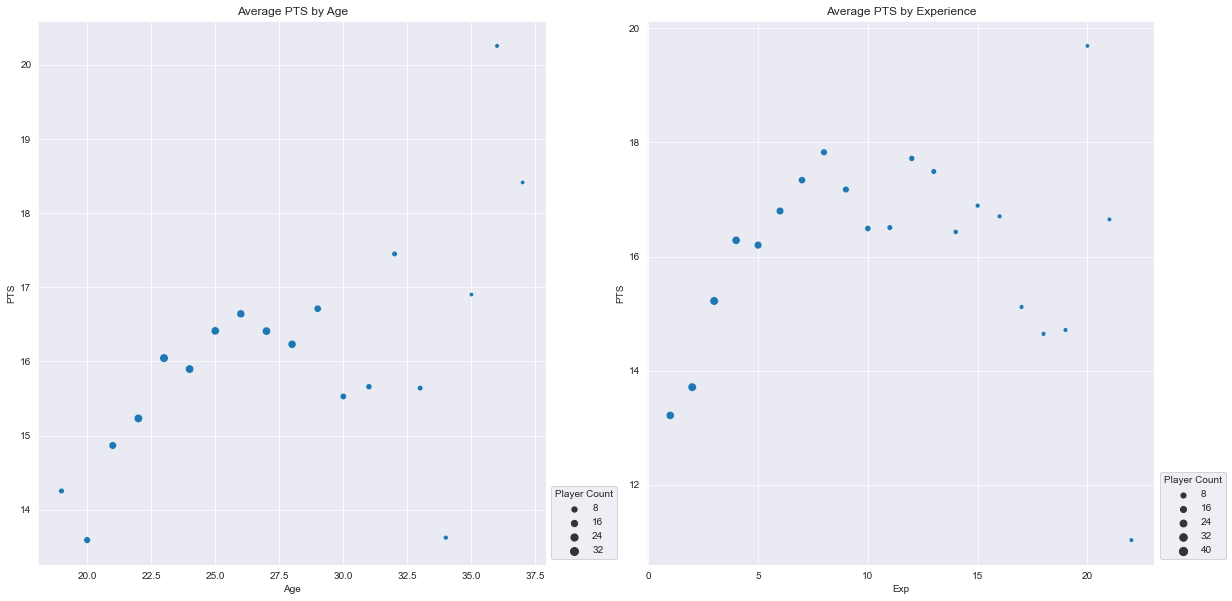

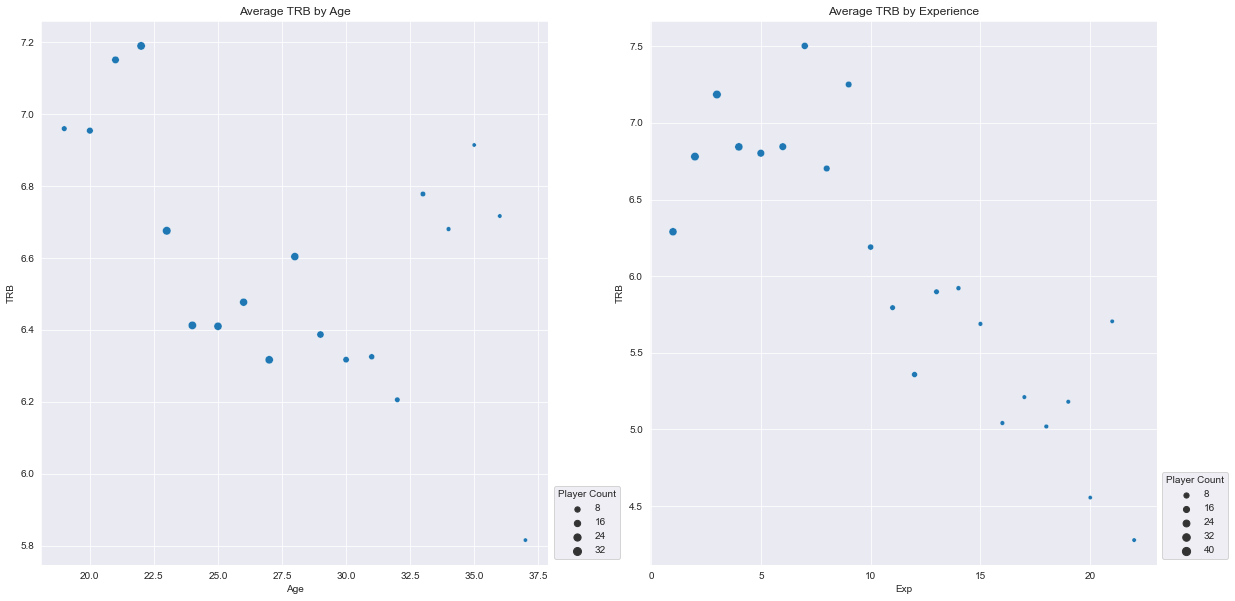

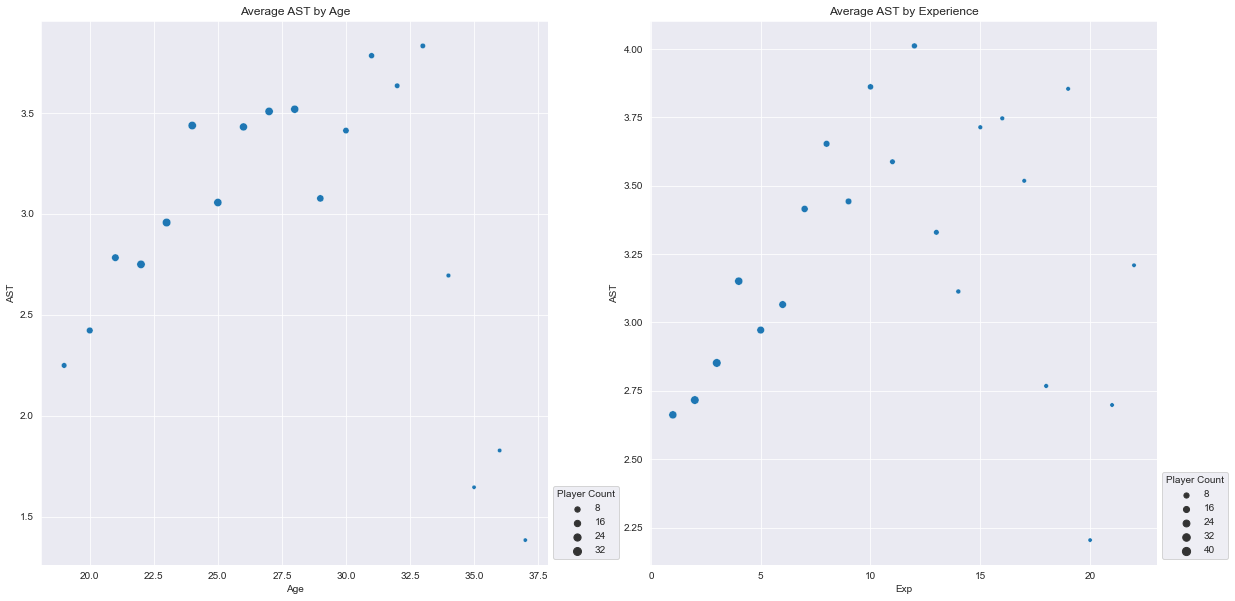

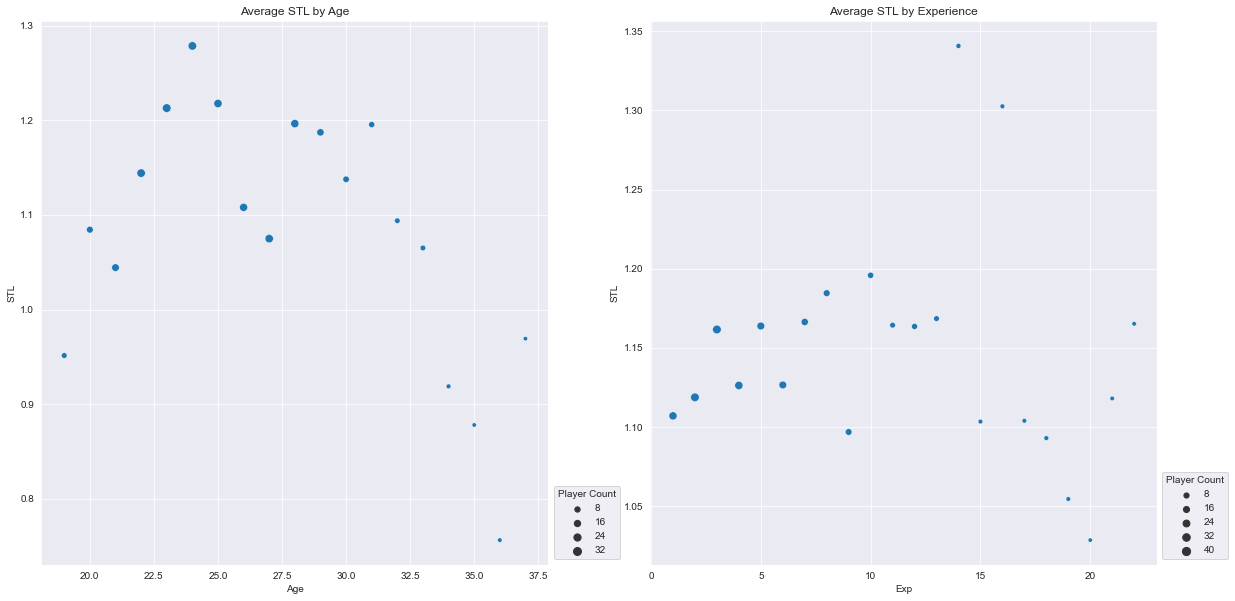

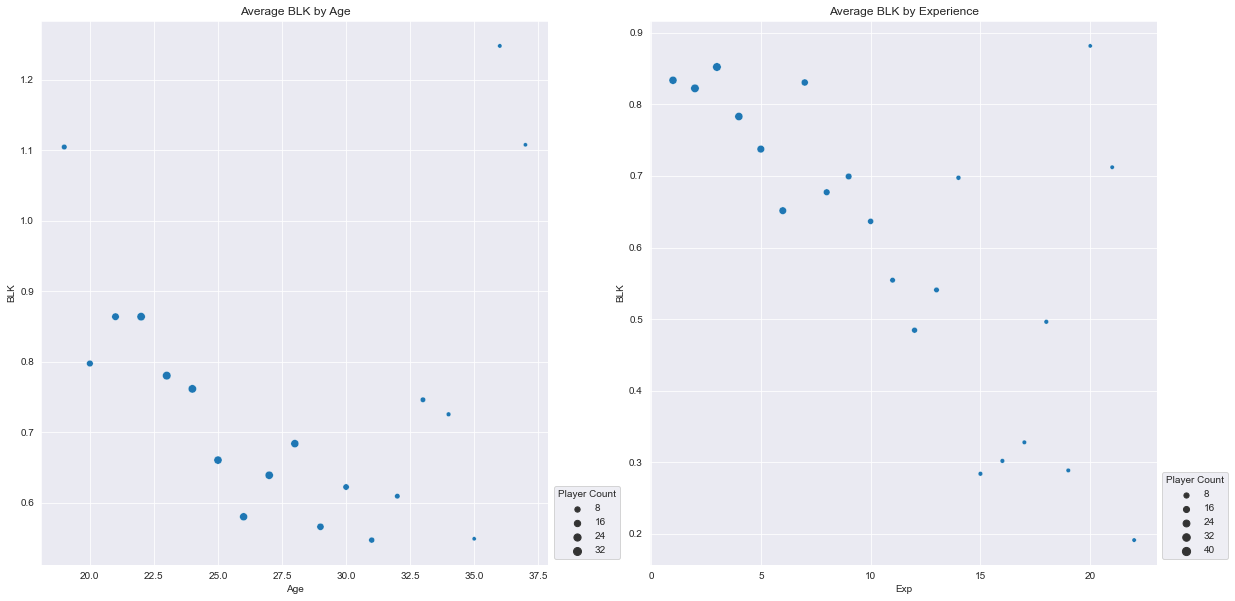

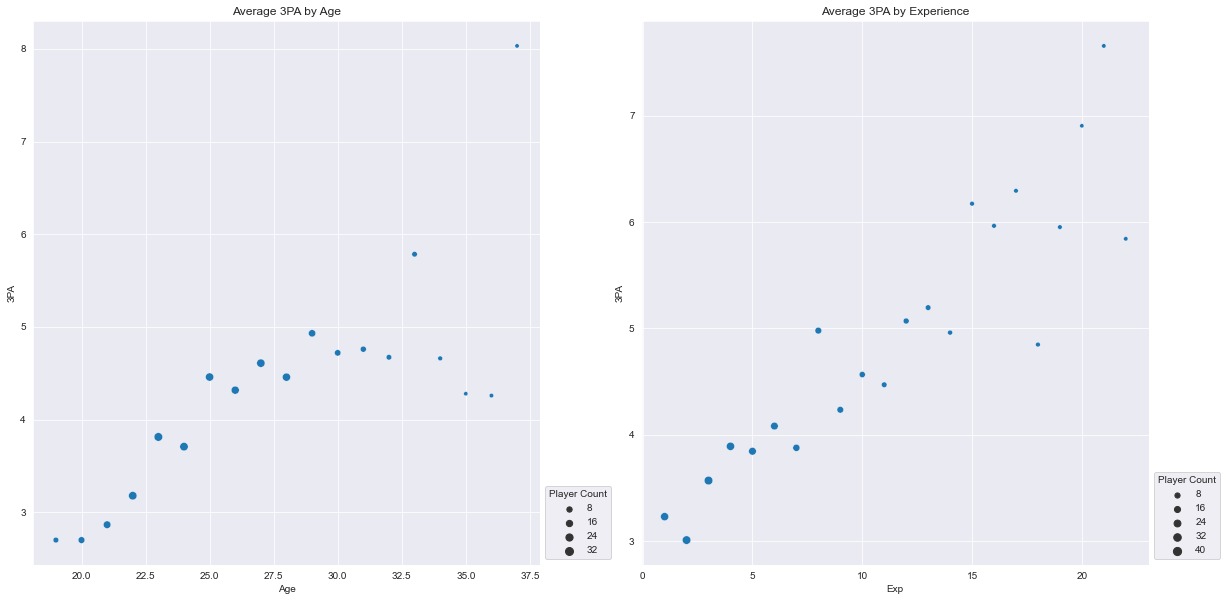

In [210]:
for col in columns_of_interest:
    fig, axes = plt.subplots(1,2)

    fig.set_figheight(10)
    fig.set_figwidth(20)

    temp_df = age.describe()[col][['count', 'mean']]
    temp_df2 = exp.describe()[col][['count', 'mean']]
    sns.scatterplot(ax=axes[0], data=temp_df, x='Age', y='mean', size='count')
    sns.scatterplot(ax=axes[1], data=temp_df2, x='Exp', y='mean', size='count')

    axes[0].set_ylabel(col)
    axes[1].set_ylabel(col)
    
    axes[0].set_title('Average ' + col + ' by Age')
    axes[1].set_title('Average ' + col + ' by Experience')

    axes[0].legend(title='Player Count', loc=(1.01,0.01))
    axes[1].legend(title='Player Count', loc=(1.01,0.01))

    plt.show()